# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
from random import uniform
from api_keys import api_key

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

## Generate Cities List

In [5]:
# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

level_0    1098
index       702
City       1098
Country    1098
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

------------------------
Proceesing: City #  1  |  Sur OM
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=sur
------------------------
Proceesing: City #  2  |  Souillac FR
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=souillac
------------------------
Proceesing: City #  3  |  New Norfolk AU
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=new+norfolk
City not found, skipping...
------------------------
Proceesing: City #  4  |  Baker City US
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=baker+city
------------------------
Proceesing: City #  5  |  Orlik RU
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=orlik
City not found, skipping...
------------------------
Proceesing: City #  6  |  Ajdabiya LY
http://api.o

------------------------
Proceesing: City #  47  |  Lebu ET
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=lebu
------------------------
Proceesing: City #  48  |  Cape Town ZA
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=cape+town
------------------------
Proceesing: City #  49  |  Nouadhibou MR
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=nouadhibou
------------------------
Proceesing: City #  50  |  Otjimbingwe NA
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=otjimbingwe
------------------------
Proceesing: City #  51  |  Ushuaia AR
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=ushuaia
City not found, skipping...
------------------------
Proceesing: City #  52  |  Fairbanks US
http://api.openweathermap

------------------------
Proceesing: City #  94  |  Nogliki RU
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=nogliki
------------------------
Proceesing: City #  95  |  Yellowknife CA
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=yellowknife
------------------------
Proceesing: City #  96  |  San Andres PH
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=san+andres
------------------------
Proceesing: City #  97  |  Saint-Francois FR
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=saint-francois
------------------------
Proceesing: City #  98  |  Port Blair IN
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=port+blair
------------------------
Proceesing: City #  99  |  Vao EE
http://api.openweathermap.org/data/2.

------------------------
Proceesing: City #  140  |  Jamestown AU
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=jamestown
City not found, skipping...
------------------------
Proceesing: City #  141  |  Coquimbo CL
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=coquimbo
------------------------
Proceesing: City #  142  |  Sobolevo RU
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=sobolevo
------------------------
Proceesing: City #  143  |  Libreville GA
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=libreville
------------------------
Proceesing: City #  144  |  Tura IN
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=tura
------------------------
Proceesing: City #  145  |  Tautira PF
http://api.openweathermap

------------------------
Proceesing: City #  185  |  Lundazi ZM
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=lundazi
------------------------
Proceesing: City #  186  |  Saint Anthony US
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=saint+anthony
------------------------
Proceesing: City #  187  |  Spassk-Dalniy RU
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=spassk-dalniy
------------------------
Proceesing: City #  188  |  Saskylakh RU
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=saskylakh
------------------------
Proceesing: City #  189  |  Tommot RU
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=tommot
------------------------
Proceesing: City #  190  |  Yamoussoukro CI
http://api.openweathermap.org/

------------------------
Proceesing: City #  230  |  Gamba CN
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=gamba
City not found, skipping...
------------------------
Proceesing: City #  231  |  Anqing CN
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=anqing
------------------------
Proceesing: City #  232  |  Bridlington GB
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=bridlington
------------------------
Proceesing: City #  233  |  Teknaf BD
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=teknaf
------------------------
Proceesing: City #  234  |  Esperance TT
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=esperance
City not found, skipping...
------------------------
Proceesing: City #  235  |  Victoria BN


------------------------
Proceesing: City #  276  |  Gonbad-e Qabus IR
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=gonbad-e+qabus
------------------------
Proceesing: City #  277  |  Newcastleton GB
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=newcastleton
------------------------
Proceesing: City #  278  |  Buin CL
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=buin
------------------------
Proceesing: City #  279  |  Caxito BR
http://api.openweathermap.org/data/2.5/weather?appid=7c711bd3e37bc03ee50509d8ae0e690c&units=IMPERIAL&q=caxito
City not found, skipping...
City not found, skipping...


KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
clean_cities_df.count()

City                279
Country             279
Temperature (F)     279
Latitude            279
Longitude           279
Humidity (%)        279
Cloudiness (%)      279
Wind Speed (mph)    279
dtype: int64

In [11]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Sur,OM,75.54,22.57,59.53,91,32,9.33
1,Souillac,FR,66.11,45.6,-0.6,39,0,9.17
2,New Norfolk,AU,54.07,-42.78,147.06,87,90,8.05
3,Baker City,US,32.36,44.77,-117.83,86,1,3.36
4,Orlik,RU,10.56,52.51,99.83,79,76,1.28
5,Ajdabiya,LY,61.95,30.75,20.22,60,92,19.28
6,Mataura,NZ,48.99,-46.19,168.86,96,0,2.84
7,Albany,US,42.6,42.65,-73.75,81,90,10.29
8,Thompson,CA,5,55.74,-97.86,65,75,5.82
9,Maicao,CO,81.48,11.38,-72.24,76,92,9.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [14]:
# Save data to a CSV file
clean_cities_df.to_csv("City_Data.csv")

#### Latitude vs. Temperature Plot

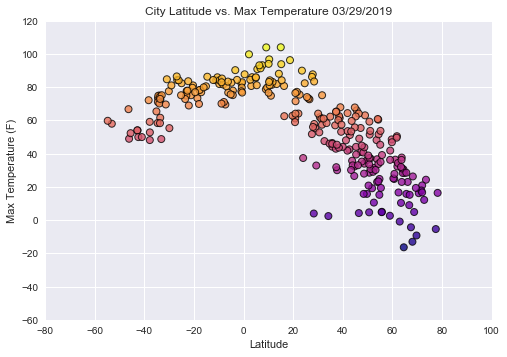

In [15]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

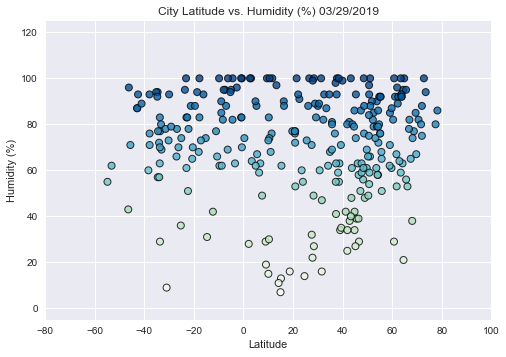

In [16]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

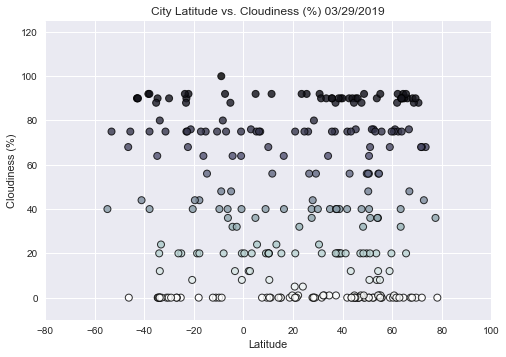

In [17]:

#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

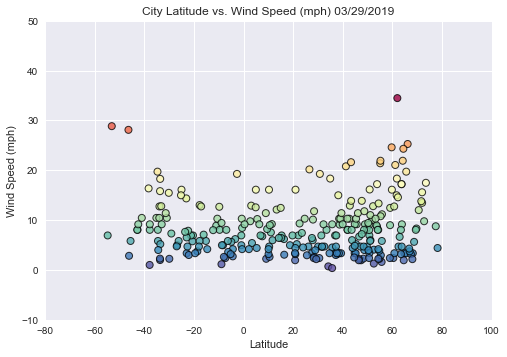

In [18]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()

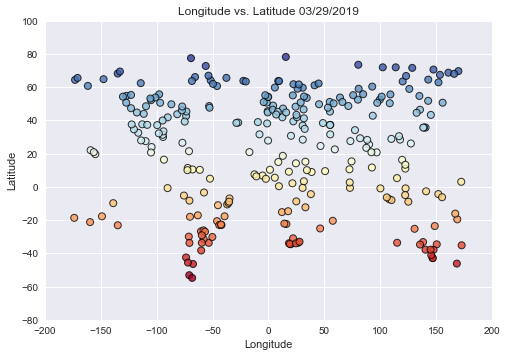

In [19]:

#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Longitude"], 
            clean_cities_df["Latitude"], c=clean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Longitude vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("Latitude_Longitude.png")

# Show plot
plt.show()

In [ ]:
# Observable Trends:

# 1. Temperatures are higher the closer you are to 0 latitude.

# 2. Humidity and latitude don't appear to be related.

# 3. The same can be said for cloudiness and windspeed.